In [47]:
import pandas as pd

import numpy as np

import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


In [48]:
telco_churn=pd.read_csv('Telco_Customer_Churn_Data.csv')


In [49]:
y=telco_churn['Churn']#seperating output varaible from dataset in y and dropping it from dataset
telco_churn.drop(columns='Churn',inplace=True)

# checking for na values if present in dataset

In [50]:
na_df=pd.DataFrame({'coloumns':telco_churn.columns,
                   'na_count':telco_churn.isnull().sum(),
                   'na_percentage':telco_churn.isnull().sum()/telco_churn.shape[0]*100})
na_df.sort_values(by='na_percentage',ascending=False).head(20)

,coloumns,na_count,na_percentage
customerID,customerID,0,0.0
gender,gender,0,0.0
MonthlyCharges,MonthlyCharges,0,0.0
PaymentMethod,PaymentMethod,0,0.0
PaperlessBilling,PaperlessBilling,0,0.0
Contract,Contract,0,0.0
StreamingMovies,StreamingMovies,0,0.0
StreamingTV,StreamingTV,0,0.0
TechSupport,TechSupport,0,0.0
DeviceProtection,DeviceProtection,0,0.0


# converting TotalCharge column into float type forcefully

In [51]:
telco_churn["TotalCharges"]=pd.to_numeric(telco_churn["TotalCharges"],errors='coerce')
telco_churn['TotalCharges'].dtypes


dtype('float64')

In [52]:
telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

# seperating num_cols and cat_cols from dataset

In [53]:
num_cols=[col for col in telco_churn.columns if telco_churn[col].dtype=='int64' or telco_churn[col].dtype=='float64']
cat_cols=[col for col in telco_churn.columns if telco_churn[col].dtype=='object']

In [54]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

# chi2 test for all cat_cols

In [55]:
#chi2 test on all input varaibles with output variable and storing p values seperately
from scipy.stats import chi2_contingency
p_values=[]
for col in cat_cols:
    contingency_table=pd.crosstab(telco_churn[col],y)
    result=chi2_contingency(contingency_table)
    p_values.append(result[1])

In [56]:
p_values_df=pd.DataFrame({'col':cat_cols,'p_values':p_values})

p_values_df.sort_values(by='p_values',ascending=False)

,col,p_values
0,customerID,4.943977e-01
1,gender,4.865787e-01
4,PhoneService,3.387825e-01
5,MultipleLines,3.464383e-03
2,Partner,2.139911e-36
3,Dependents,4.924922e-43
14,PaperlessBilling,4.073355e-58
11,StreamingTV,5.528994e-82
12,StreamingMovies,2.667757e-82
9,DeviceProtection,5.505219e-122


In [57]:
#Creating a list of uncorrelated columns
result_df=list(p_values_df[p_values_df['p_values']>0.05].col)
result_df

['customerID', 'gender', 'PhoneService']

In [58]:
#Dropping uncorrelated columns

telco_churn.drop(columns = result_df, inplace = True)

In [59]:
telco_churn.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

# Train_test split

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(telco_churn,y,test_size=0.2,random_state=42)

# checking again for the number of columns in cat_cols and num_cols

In [61]:
num_cols=[col for col in telco_churn.columns if telco_churn[col].dtype=='int64' or telco_churn[col].dtype=='float64']
cat_cols=[col for col in telco_churn.columns if telco_churn[col].dtype=='object']

# missing value imputation

In [62]:
for col in cat_cols:
    x_train[col]=x_train[col].fillna(x_train[col].mode())
    x_test[col]=x_test[col].fillna(x_train[col].mode())

In [63]:
for col in num_cols:
    x_train[col]=x_train[col].fillna(x_train[col].mean())
    x_test[col]=x_test[col].fillna(x_train[col].mean())

# scaling the continuos variable

In [64]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [65]:
minmaxscaler=StandardScaler()

for col in num_cols:
    x_train[col]=minmaxscaler.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=minmaxscaler.transform(np.array(x_test[col]).reshape(-1,1))

# one hot encoding

In [66]:
oe_train_df=pd.get_dummies(x_train[cat_cols])
oe_test_df=pd.get_dummies(x_test[cat_cols])

In [67]:
#Aligning both train and test data so that they have equal number of columns

x_train_oe,x_test_oe = oe_train_df.align(oe_test_df,join='inner',axis=1,fill_value=0)

In [68]:
x_train_final=pd.concat([x_train_oe,x_train[num_cols]],axis=1)
x_test_final=pd.concat([x_test_oe,x_test[num_cols]],axis=1)

In [69]:
x_train_final.shape
x_test_final.shape


(1409, 41)

# Training a Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [71]:
logreg=LogisticRegression()
logreg.fit(x_train_final,y_train)
predictions=logreg.predict(x_test_final) # running the model on the test data to get the predictions
predictions

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [72]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,accuracy_score

confusion_matrix(y_test,predictions) # confusion matrix

array([[932, 104],
       [151, 222]], dtype=int64)

# calculating precision score, recall score, f1 score, roc_auc_score

In [73]:

print('precision score:',precision_score(y_test,predictions,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,predictions,pos_label='Yes'))
print('F1 score:',f1_score(y_test,predictions,pos_label='Yes'))

precision score: 0.6809815950920245
Recall Score: 0.5951742627345844
F1 score: 0.6351931330472103


In [74]:
y_probab=logreg.predict_proba(x_test_final)[::,-1] 
y_probab

array([0.68328725, 0.06415894, 0.004509  , ..., 0.05231345, 0.01306426,
       0.4963126 ])

In [75]:
roc_auc_score(y_test,y_probab) #AUC score


0.8623184655356237

Text(0, 0.5, 'false postive rate')

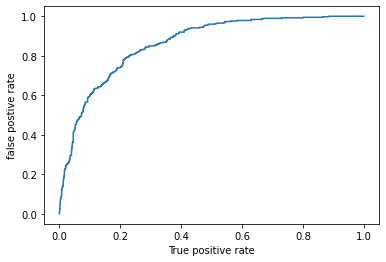

In [76]:

fpr,tpr,thresholds=roc_curve(y_test,y_probab,pos_label='Yes')

plt.plot(fpr,tpr)                           #plotting curve

plt.xlabel('True positive rate')
plt.ylabel('false postive rate')

# DecisionTreeClassifier model

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtr=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=7,max_leaf_nodes=15)

dtr.fit(x_train_final,y_train)# fittinf the model

dtr_predict=dtr.predict(x_test_final) # predicting on test data
accuracy_score(dtr_predict,y_test) # calculating accuracy score


0.8005677785663591

In [78]:
print('precision score:',precision_score(y_test,dtr_predict,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,dtr_predict,pos_label='Yes'))
print('F1 score:',f1_score(y_test,dtr_predict,pos_label='Yes'))

precision score: 0.6204188481675392
Recall Score: 0.6353887399463807
F1 score: 0.6278145695364238


In [79]:
y_probab=logreg.predict_proba(x_test_final)[::,-1] 
y_probab

array([0.68328725, 0.06415894, 0.004509  , ..., 0.05231345, 0.01306426,
       0.4963126 ])

In [80]:
roc_auc_score(y_test,y_probab) #AUC score

0.8623184655356237

[Text(111.6, 199.32, 'X[28] <= 0.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(31.885714285714286, 163.07999999999998, 'X[39] <= 0.958\ngini = 0.132\nsamples = 2551\nvalue = [2370, 181]'),
 Text(15.942857142857143, 126.83999999999999, 'gini = 0.077\nsamples = 1927\nvalue = [1850, 77]'),
 Text(47.82857142857143, 126.83999999999999, 'X[30] <= 0.5\ngini = 0.278\nsamples = 624\nvalue = [520, 104]'),
 Text(31.885714285714286, 90.6, 'gini = 0.365\nsamples = 325\nvalue = [247, 78]'),
 Text(63.77142857142857, 90.6, 'gini = 0.159\nsamples = 299\nvalue = [273, 26]'),
 Text(191.31428571428572, 163.07999999999998, 'X[8] <= 0.5\ngini = 0.489\nsamples = 3083\nvalue = [1768, 1315]'),
 Text(127.54285714285714, 126.83999999999999, 'X[38] <= -1.182\ngini = 0.41\nsamples = 1386\nvalue = [987, 399]'),
 Text(95.65714285714286, 90.6, 'X[10] <= 0.5\ngini = 0.496\nsamples = 461\nvalue = [251, 210]'),
 Text(79.71428571428572, 54.359999999999985, 'X[37] <= 0.923\ngini = 0.435\nsamples = 213\nval

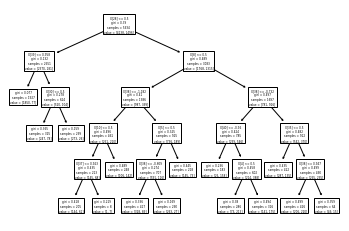

In [81]:
#plotting tree

from sklearn import tree
tree.plot_tree(dtr) 

# Hyperparameter-tunning for DecisionTreeClassifier

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#defining parameters we want to tune

hyp_dict={'max_depth':[8,10,12,15,18],
         'min_samples_split':[8,10,14],
         'max_leaf_nodes':[8,9,10,12]
         }

hyp_dict1={'max_depth':[8,10,12,15,18],
         'min_samples_split':[8,10,14],
         'max_leaf_nodes':[8,9,10,12]
         }

##instantiate GridSearchCV ,fit model,and make predictions
gcv=GridSearchCV(estimator=dtr,param_grid=hyp_dict,cv=10,verbose=5)
rcv=RandomizedSearchCV(estimator=dtr,param_distributions=hyp_dict1,cv=15,n_iter=25)

#fitting the model
gcv.fit(x_train_final,y_train)
rcv.fit(x_train_final,y_train)

gcv.best_params_
gcv.best_score_

rcv.best_params_
rcv.best_score_


dtc_gcv_pred=gcv.predict(x_test_final)
accuracy_score(dtc_gcv_pred,y_test)

dtc_rcv_pred=gcv.predict(x_test_final)
accuracy_score(dtc_rcv_pred,y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=8, score=0.780, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=8, score=0.814, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=8, score=0.791, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=8, score=0.782, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=8, score=0.774, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=8, score=0.785, total=   0.0s
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=8, score=0.782, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=10, score=0.780, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=10, score=0.814, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=10, score=0.791, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=10, score=0.782, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=10, score=0.774, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=8, max_leaf_nodes=8, min_samples_split=10, 

[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=8, score=0.790, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_samples_split=8 .............
[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=8, score=0.787, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_samples_split=8 .............
[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=8, score=0.782, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_samples_split=8 .............
[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=8, score=0.783, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_samples_split=8 .............
[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=8, score=0.785, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_samples_split=10 ............
[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=10, score=0.780, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=10, min_samples_split=10 ............
[CV]  max_depth=8, max_leaf_nodes=10, min_samples_split=1

[CV]  max_depth=10, max_leaf_nodes=8, min_samples_split=8, score=0.780, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=10, max_leaf_nodes=8, min_samples_split=8, score=0.814, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=10, max_leaf_nodes=8, min_samples_split=8, score=0.791, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=10, max_leaf_nodes=8, min_samples_split=8, score=0.782, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=10, max_leaf_nodes=8, min_samples_split=8, score=0.774, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=10, max_leaf_nodes=8, min_samples_split=8, score=0.785, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=10, max_leaf_nodes=8, min_samples_split=8,

[CV]  max_depth=10, max_leaf_nodes=9, min_samples_split=14, score=0.774, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=10, max_leaf_nodes=9, min_samples_split=14, score=0.785, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=10, max_leaf_nodes=9, min_samples_split=14, score=0.787, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=10, max_leaf_nodes=9, min_samples_split=14, score=0.778, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=10, max_leaf_nodes=9, min_samples_split=14, score=0.783, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=10, max_leaf_nodes=9, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=10, min_samples_split=8 ............
[CV]  max_depth=10, max_leaf_nodes=10, min_samples_s

[CV]  max_depth=10, max_leaf_nodes=12, min_samples_split=14, score=0.790, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=10, max_leaf_nodes=12, min_samples_split=14, score=0.792, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=10, max_leaf_nodes=12, min_samples_split=14, score=0.767, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=10, max_leaf_nodes=12, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=10, max_leaf_nodes=12, min_samples_split=14, score=0.785, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=12, max_leaf_nodes=8, min_samples_split=8, score=0.780, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=12, max_leaf_nodes=8, min_sample

[CV]  max_depth=12, max_leaf_nodes=9, min_samples_split=14, score=0.785, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=12, max_leaf_nodes=9, min_samples_split=14, score=0.787, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=12, max_leaf_nodes=9, min_samples_split=14, score=0.778, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=12, max_leaf_nodes=9, min_samples_split=14, score=0.783, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=12, max_leaf_nodes=9, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=10, min_samples_split=8 ............
[CV]  max_depth=12, max_leaf_nodes=10, min_samples_split=8, score=0.780, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=10, min_samples_split=8 ............
[CV]  max_depth=12, max_leaf_nodes=10, min_samples_s

[CV]  max_depth=12, max_leaf_nodes=12, min_samples_split=14, score=0.790, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=12, max_leaf_nodes=12, min_samples_split=14, score=0.792, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=12, max_leaf_nodes=12, min_samples_split=14, score=0.767, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=12, max_leaf_nodes=12, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=12, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=12, max_leaf_nodes=12, min_samples_split=14, score=0.785, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=15, max_leaf_nodes=8, min_samples_split=8, score=0.780, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=8, min_samples_split=8 .............
[CV]  max_depth=15, max_leaf_nodes=8, min_sample

[CV]  max_depth=15, max_leaf_nodes=9, min_samples_split=14, score=0.791, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=15, max_leaf_nodes=9, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=15, max_leaf_nodes=9, min_samples_split=14, score=0.774, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=15, max_leaf_nodes=9, min_samples_split=14, score=0.785, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=15, max_leaf_nodes=9, min_samples_split=14, score=0.787, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=15, max_leaf_nodes=9, min_samples_split=14, score=0.778, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=15, max_leaf_nodes=9, min_samples_sp

[CV]  max_depth=15, max_leaf_nodes=12, min_samples_split=14, score=0.798, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=15, max_leaf_nodes=12, min_samples_split=14, score=0.789, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=15, max_leaf_nodes=12, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=15, max_leaf_nodes=12, min_samples_split=14, score=0.790, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=15, max_leaf_nodes=12, min_samples_split=14, score=0.792, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=15, max_leaf_nodes=12, min_samples_split=14, score=0.767, total=   0.0s
[CV] max_depth=15, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=15, max_leaf_nodes=12, min_sam

[CV]  max_depth=18, max_leaf_nodes=9, min_samples_split=10, score=0.782, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=18, max_leaf_nodes=9, min_samples_split=14, score=0.780, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=18, max_leaf_nodes=9, min_samples_split=14, score=0.814, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=18, max_leaf_nodes=9, min_samples_split=14, score=0.791, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=18, max_leaf_nodes=9, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=18, max_leaf_nodes=9, min_samples_split=14, score=0.774, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=9, min_samples_split=14 ............
[CV]  max_depth=18, max_leaf_nodes=9, min_samples_sp

[CV]  max_depth=18, max_leaf_nodes=12, min_samples_split=10, score=0.785, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=18, max_leaf_nodes=12, min_samples_split=14, score=0.777, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=18, max_leaf_nodes=12, min_samples_split=14, score=0.821, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=18, max_leaf_nodes=12, min_samples_split=14, score=0.798, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=18, max_leaf_nodes=12, min_samples_split=14, score=0.789, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=18, max_leaf_nodes=12, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=18, max_leaf_nodes=12, min_samples_split=14 ...........
[CV]  max_depth=18, max_leaf_nodes=12, min_sam

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   12.7s finished


0.794889992902768

In [83]:
print('precision score:',precision_score(y_test,dtc_gcv_pred,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,dtc_gcv_pred,pos_label='Yes'))
print('F1 score:',f1_score(y_test,dtc_gcv_pred,pos_label='Yes'))

precision score: 0.6590909090909091
Recall Score: 0.46648793565683644
F1 score: 0.5463108320251178


In [84]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='squared_loss',max_iter=1000,eta0=0.0001,learning_rate='invscaling',warm_start=True,verbose=3)

sgd.fit(x_train_final,y_train)

-- Epoch 1
Norm: 0.02, NNZs: 41, Bias: -0.006543, T: 5634, Avg. loss: 0.486335
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 41, Bias: -0.009184, T: 11268, Avg. loss: 0.475208
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 41, Bias: -0.011151, T: 16902, Avg. loss: 0.468428
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 41, Bias: -0.012769, T: 22536, Avg. loss: 0.463196
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 41, Bias: -0.014166, T: 28170, Avg. loss: 0.458844
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 41, Bias: -0.015404, T: 33804, Avg. loss: 0.455083
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 41, Bias: -0.016523, T: 39438, Avg. loss: 0.451754
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.04, NNZs: 41, Bias: -0.017549, T: 45072, Avg. loss: 0.448754
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.05, NNZs: 41, Bias: -0.018499, T: 50706, Avg. loss: 0.446016
T

SGDClassifier(eta0=0.0001, learning_rate='invscaling', loss='squared_loss',
              verbose=3, warm_start=True)

In [85]:
sgd_pred=sgd.predict(x_test_final)
sgd_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

# Random Forest Classifier model

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf=RandomForestClassifier(criterion='gini',n_estimators=20,random_state=42,max_depth=7,max_leaf_nodes=15)
rf.fit(x_train_final,y_train)

rf_pred=rf.predict(x_test_final)



In [87]:
print('precision score:',precision_score(y_test,rf_pred,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,rf_pred,pos_label='Yes'))
print('F1 score:',f1_score(y_test,rf_pred,pos_label='Yes'))

precision score: 0.6818181818181818
Recall Score: 0.44235924932975873
F1 score: 0.5365853658536586


In [88]:
y_probab=logreg.predict_proba(x_test_final)[::,-1] 
y_probab

array([0.68328725, 0.06415894, 0.004509  , ..., 0.05231345, 0.01306426,
       0.4963126 ])

In [89]:
roc_auc_score(y_test,y_probab) #AUC score

0.8623184655356237

# hyperparameter tunning for random forest

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#defining parameters we want to tune

hyp_dict={'max_depth':[8,10,12,15,18],
         'min_samples_split':[8,10,14],
         'max_leaf_nodes':[8,9,10,12]
         }

hyp_dict1={'max_depth':[5,6,8,10,12,15],
         'min_samples_split':[8,10,14],
         'max_leaf_nodes':[8,9,10,12]
         }

##instantiate GridSearchCV ,fit model,and make predictions

gcv=GridSearchCV(estimator=dtr,param_grid=hyp_dict,cv=10)
rcv=RandomizedSearchCV(estimator=dtr,param_distributions=hyp_dict1,cv=10,n_iter=20)

#fitting the model
gcv.fit(x_train_final,y_train)
rcv.fit(x_train_final,y_train)

#getting best parameters and scores

rcv.best_params_
rcv.best_score_

gcv.best_params_
gcv.best_score_

dtc_gcv_pred=gcv.predict(x_test_final)
dtc_rcv_pred=rcv.predict(x_test_final)

In [91]:
print('precision score:',precision_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print('F1 score:',f1_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print(' confusion matrix', confusion_matrix(y_test,dtc_rcv_pred))

precision score: 0.6590909090909091
Recall Score: 0.46648793565683644
F1 score: 0.5463108320251178
 confusion matrix [[946  90]
 [199 174]]


In [92]:
print('precision score:',precision_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print('F1 score:',f1_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print(' confusion matrix', confusion_matrix(y_test,dtc_rcv_pred))

precision score: 0.6590909090909091
Recall Score: 0.46648793565683644
F1 score: 0.5463108320251178
 confusion matrix [[946  90]
 [199 174]]


# Gradient boost Classifier model

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

Gbc=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=20,max_depth=7,max_leaf_nodes=15,
                               warm_start=True,verbose=3,)
Gbc.fit(x_train_final,y_train)
y_predict=Gbc.predict(x_test_final)
accuracy_score(y_predict,y_test)

      Iter       Train Loss   Remaining Time 
         1           1.1004            0.30s
         2           1.0556            0.28s
         3           1.0194            0.27s
         4           0.9891            0.19s
         5           0.9637            0.19s
         6           0.9416            0.18s
         7           0.9229            0.17s
         8           0.9061            0.17s
         9           0.8924            0.16s
        10           0.8796            0.14s
        11           0.8688            0.13s
        12           0.8599            0.12s
        13           0.8510            0.10s
        14           0.8430            0.09s
        15           0.8362            0.07s
        16           0.8298            0.06s
        17           0.8239            0.04s
        18           0.8184            0.03s
        19           0.8135            0.01s
        20           0.8094            0.00s


0.8055358410220014

# hyperparameter tunning for gradient boost classifier

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#define the hyperparameters we want to tune
hyp_dict={'max_depth':[1,3,5,6,7],
         'min_samples_split':[8,10,14],
         'max_leaf_nodes':[8,9,10,12],}

hyp_dict1={'max_depth':[1,3,5,6,7],
         'min_samples_split':[8,10,14],
         'max_leaf_nodes':[8,9,10,12],}
        
        
                          
#instantiate GridSearchCV  and RandomizedSearchCV ,fit model,and make predictions
gcv=GridSearchCV(estimator=dtr,param_grid=hyp_dict,cv=10,verbose=42)
rcv=RandomizedSearchCV(estimator=dtr,param_distributions=hyp_dict,cv=10,n_iter=20)

gcv.fit(x_train_final,y_train)
rcv.fit(x_train_final,y_train)

gcv.best_params_
gcv.best_score_

rcv.best_params_
rcv.best_score_

dtc_gcv_pred=gcv.predict(x_test_final)
dtc_rcv_pred=rcv.predict(x_test_final)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=8, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=8, score=0.735, total=   0.0s
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s


[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=10, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=10, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=10, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=10 .

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s remaining:    0.0s



[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=14, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=14, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=14, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=14, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=14, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=1, max_leaf_nodes=8, min_samples_split=14, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=8, min_samples_split=14 

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=8, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=8, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=8, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=8, score=

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.7s remaining:    0.0s


[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=10, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=10, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=10 .............
[CV]  max_depth=1, max_leaf_nodes=9, min_samples_split=10, score=0.735, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=9, min_samples_split=10 .

[CV]  max_depth=1, max_leaf_nodes=12, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=1, max_leaf_nodes=12, min_samples_split=8, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=12, min_samples_split=10 ............
[CV]  max_depth=1, max_leaf_nodes=12, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=12, min_samples_split=10 ............
[CV]  max_depth=1, max_leaf_nodes=12, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=12, min_samples_split=10 ............
[CV]  max_depth=1, max_leaf_nodes=12, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=12, min_samples_split=10 ............
[CV]  max_depth=1, max_leaf_nodes=12, min_samples_split=10, score=0.734, total=   0.0s
[CV] max_depth=1, max_leaf_nodes=12, min_samples_split=10 ............
[CV]  max_depth=1, max_leaf_nodes=12, min_samples_spli

[CV]  max_depth=3, max_leaf_nodes=9, min_samples_split=8, score=0.782, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=3, max_leaf_nodes=9, min_samples_split=8, score=0.774, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=3, max_leaf_nodes=9, min_samples_split=8, score=0.783, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=3, max_leaf_nodes=9, min_samples_split=8, score=0.785, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=3, max_leaf_nodes=9, min_samples_split=8, score=0.778, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=3, max_leaf_nodes=9, min_samples_split=8, score=0.774, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=3, max_leaf_nodes=9, min_samples_split=8, score=

[CV]  max_depth=3, max_leaf_nodes=10, min_samples_split=14, score=0.771, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=3, max_leaf_nodes=12, min_samples_split=8, score=0.775, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=3, max_leaf_nodes=12, min_samples_split=8, score=0.814, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=3, max_leaf_nodes=12, min_samples_split=8, score=0.787, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=3, max_leaf_nodes=12, min_samples_split=8, score=0.782, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=3, max_leaf_nodes=12, min_samples_split=8, score=0.774, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=3, max_leaf_nodes=12, min_samples_split=8

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_split=14, score=0.787, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_split=14, score=0.778, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_split=14, score=0.783, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_split=8, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_split=8, score=0.814, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_split=8, sc

[CV]  max_depth=5, max_leaf_nodes=10, min_samples_split=14, score=0.783, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=5, max_leaf_nodes=10, min_samples_split=14, score=0.785, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=5, max_leaf_nodes=12, min_samples_split=8, score=0.777, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=5, max_leaf_nodes=12, min_samples_split=8, score=0.821, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=5, max_leaf_nodes=12, min_samples_split=8, score=0.798, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=5, max_leaf_nodes=12, min_samples_split=8, score=0.789, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=12, min_samples_split=8 .............
[CV]  max_depth=5, max_leaf_nodes=12, min_samples_split=

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_split=14, score=0.778, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_split=14, score=0.783, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_split=14, score=0.782, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_split=8, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_split=8, score=0.814, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_split=8, score=0.791, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_split=8 ..............
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_split=8, sco

[CV]  max_depth=6, max_leaf_nodes=10, min_samples_split=14, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=6, max_leaf_nodes=10, min_samples_split=14, score=0.830, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=6, max_leaf_nodes=10, min_samples_split=14, score=0.791, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=6, max_leaf_nodes=10, min_samples_split=14, score=0.798, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=6, max_leaf_nodes=10, min_samples_split=14, score=0.774, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=6, max_leaf_nodes=10, min_samples_split=14, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=6, max_leaf_nodes=10, min_samples_sp

[CV] max_depth=7, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_split=10, score=0.778, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_split=10, score=0.783, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_split=10 .............
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_split=10, score=0.782, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_split=14, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_split=14, score=0.814, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_split=14 .............
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_split=14, score=0.791, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_split=14 .

[CV]  max_depth=7, max_leaf_nodes=10, min_samples_split=10, score=0.787, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=10, min_samples_split=10 ............
[CV]  max_depth=7, max_leaf_nodes=10, min_samples_split=10, score=0.782, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=10, min_samples_split=10 ............
[CV]  max_depth=7, max_leaf_nodes=10, min_samples_split=10, score=0.783, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=10, min_samples_split=10 ............
[CV]  max_depth=7, max_leaf_nodes=10, min_samples_split=10, score=0.785, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=7, max_leaf_nodes=10, min_samples_split=14, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=7, max_leaf_nodes=10, min_samples_split=14, score=0.830, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=10, min_samples_split=14 ............
[CV]  max_depth=7, max_leaf_nodes=10, min_samples_sp

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   13.0s finished


In [95]:
print('precision score:',precision_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print('F1 score:',f1_score(y_test,dtc_rcv_pred,pos_label='Yes'))
print(' confusion matrix', confusion_matrix(y_test,dtc_rcv_pred))

precision score: 0.6590909090909091
Recall Score: 0.46648793565683644
F1 score: 0.5463108320251178
 confusion matrix [[946  90]
 [199 174]]


In [96]:
print('precision score:',precision_score(y_test,dtc_gcv_pred,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,dtc_gcv_pred,pos_label='Yes'))
print('F1 score:',f1_score(y_test,dtc_gcv_pred,pos_label='Yes'))
print(' confusion matrix', confusion_matrix(y_test,dtc_gcv_pred))

precision score: 0.6590909090909091
Recall Score: 0.46648793565683644
F1 score: 0.5463108320251178
 confusion matrix [[946  90]
 [199 174]]


# Adaboost classifier model

In [97]:
from sklearn.ensemble import AdaBoostClassifier
Abc=AdaBoostClassifier(base_estimator=None,
                     n_estimators=50, learning_rate=0.01, random_state=42)
Abc.fit(x_train_final,y_train)
y_predict=Abc.predict(x_test_final)
accuracy_score(y_predict,y_test)

0.7352732434350603

# hyperparametertunning for AdaBoostClassifier

In [98]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#define the hyperparameters we want to tune

param_grid={'n_estimators':[100,200],'learning_rate':[0.001,0.01,0.1,0.2,0.5]}

#instantiate GridSearchCV ,fit model,and make predictions

gs_ab=GridSearchCV(AdaBoostClassifier(),param_grid=param_grid)
rs_gb=RandomizedSearchCV(AdaBoostClassifier(),param_distributions=param_grid)

gs_ab.fit(x_train_final,y_train)
rs_gb.fit(x_train_final,y_train)

y_predict=gs_ab.predict(x_test_final)
x_predict=rs_gb.predict(x_test_final)


In [99]:
# calculating precision,recall,f1_score for Gridsearch CV

print('precision score:',precision_score(y_test,y_predict,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,y_predict,pos_label='Yes'))
print('F1 score:',f1_score(y_test,y_predict,pos_label='Yes'))
print(' confusion matrix', confusion_matrix(y_test,y_predict))

precision score: 0.6687898089171974
Recall Score: 0.5630026809651475
F1 score: 0.6113537117903931
 confusion matrix [[932 104]
 [163 210]]


In [100]:
# calculating precision,recall,f1_score for RandomSearch CV

print('precision score:',precision_score(y_test,x_predict,pos_label='Yes'))
print('Recall Score:',recall_score(y_test,x_predict,pos_label='Yes'))
print('F1 score:',f1_score(y_test,x_predict,pos_label='Yes'))
print(' confusion matrix', confusion_matrix(y_test,x_predict))

precision score: 0.6687898089171974
Recall Score: 0.5630026809651475
F1 score: 0.6113537117903931
 confusion matrix [[932 104]
 [163 210]]


In [101]:
y_probab=logreg.predict_proba(x_test_final)[::,-1] 
y_probab

array([0.68328725, 0.06415894, 0.004509  , ..., 0.05231345, 0.01306426,
       0.4963126 ])

In [102]:
roc_auc_score(y_test,y_probab) #roc_auc_score

0.8623184655356237

# support vector classifier model

In [104]:
from sklearn.svm import SVC
svc=SVC(C=1.0, kernel='rbf',
        degree=3, gamma='scale',
        coef0=0.0, shrinking=True,
        probability=False, tol=0.001, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=- 1,
        decision_function_shape='ovr',
        break_ties=False, random_state=None)
svc.fit(x_train_final,y_train)
svc_pred=svc.predict(x_test_final)

In [105]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#define the parameters we want to tune

param_grid={'kernel':['linear','poly','rbf'],'C':[0.001,0.01,0.1,1,10],'gamma':[0.001,0.01,0.1,1]}

#instantiate GridSearchCV, fitModel, and make Prediction

gs_svc=GridSearchCV(SVC(),param_grid=param_grid)
gs_svc.fit(x_train_final,y_train)
y_pred=gs_SVC.predict(x_test)

NameError: name 'gs_SVC' is not defined